In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### Importing an extension of the "missing" functions from Pandas

In [6]:
%run utils/u.0.0-pandas_missing_extension.ipynb

### Importing functions of the DataFrame Dictionary

In [7]:
%run utils/u.0.1-df_dictionary.ipynb

### Getting the interim data

In [8]:
arg_di_df = pd.read_csv('../data/interim/WDICSV_INTERIM.csv')
print(arg_di_df.shape)
arg_di_df.info()

(64, 98)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 98 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   EG.ELC.ACCS.ZS            33 non-null     float64
 2   FX.OWN.TOTL.ZS            4 non-null      float64
 3   FX.OWN.TOTL.OL.ZS         4 non-null      float64
 4   FX.OWN.TOTL.40.ZS         4 non-null      float64
 5   FX.OWN.TOTL.PL.ZS         4 non-null      float64
 6   FX.OWN.TOTL.60.ZS         4 non-null      float64
 7   FX.OWN.TOTL.SO.ZS         4 non-null      float64
 8   FX.OWN.TOTL.YG.ZS         4 non-null      float64
 9   per_si_allsi.adq_pop_tot  12 non-null     float64
 10  per_allsp.adq_pop_tot     12 non-null     float64
 11  per_sa_allsa.adq_pop_tot  12 non-null     float64
 12  per_lm_alllm.adq_pop_tot  10 non-null     float64
 13  SE.PRM.TENR               26 non-null     float64
 14  SL.

### Setting initial plots styles

In [9]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### Adding one column for years of military dictatorship

In [10]:
years_of_military_dictatorship = [
    (1930,1932),
    (1943,1946),
    (1955,1958),
    (1962,1963),
    (1966,1973),
    (1976,1983)
]

arg_di_df['year.of.dictatorship'] = arg_di_df['Year'].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship))

In [ ]:
dictionary = pd.read_csv('../data/utils/DF_DICTIONARY.csv')
dictionary = pd.concat(
    [
        dictionary,
        pd.DataFrame({
            'Indicator Name': ['It was a year of military dictatorship'],
            'Indicator Code': ['year.of.dictatorship'],
        })
    ]
)
df_dictionary = dictionary.to_csv('../data/utils/DF_DICTIONARY.csv', index=False)

<Axes: >

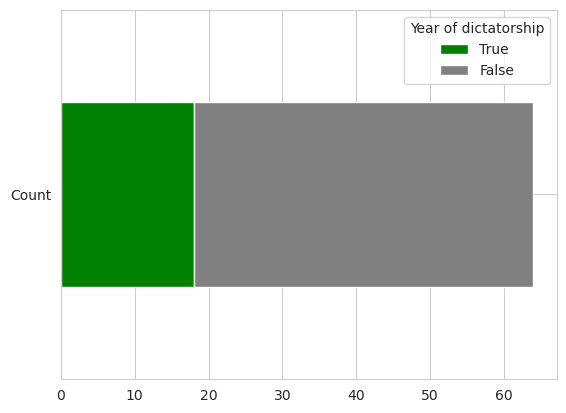

In [11]:
years_of_dictatorship = pd.DataFrame(arg_di_df.rename(columns={"year.of.dictatorship": "Year of dictatorship"}).value_counts('Year of dictatorship',ascending=True))
years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
years_of_dictatorship.plot(kind='barh',stacked=True, color=['green','grey'])

### Exploring missing data of years of military dictatorship

In [13]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year.of.dictatorship']]
arg_dictorship_years_df

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.767,True
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.309,True
6,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888,True
7,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.398,True
8,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.901,True
9,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.394,True
10,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.377590,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78.880,True
11,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.440980,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.321,True
12,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.620810,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.743,True
13,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.751631,5.0,NaN,NaN,NaN,NaN,NaN,NaN,80.158,True


#### Getting the percentage of variables with a minimum percentage of missing values

In [41]:
def percentage_of_variables_with_min_pct_missing(df: pd.DataFrame, percentage: float, greater_than_pct = True):
    variable_summary = df.missing.missing_variable_summary()
    if greater_than_pct:
        return round(variable_summary[variable_summary['pct_missing'] >= percentage]['variable'].count() / variable_summary.shape[0], 2)
    else:
        return round(variable_summary[variable_summary['pct_missing'] <= percentage]['variable'].count() / variable_summary.shape[0], 2)
        
    
percentage_of_variables_with_min_pct_missing(arg_dictorship_years_df, 50, True)

0.71

#### Getting the column names with a maximum percentage of missing values

In [40]:
def percentage_of_variables_with_min_pct_missing(df: pd.DataFrame, percentage: float, greater_than_pct = True):
    variable_summary = arg_dictorship_years_df.missing.missing_variable_summary()
    if greater_than_pct:
        missing_variables_code = list(variable_summary[variable_summary['pct_missing'] >= percentage]['variable'])
    else:
        missing_variables_code = list(variable_summary[variable_summary['pct_missing'] <= percentage]['variable'])
    return get_indexes_names(missing_variables_code)

percentage_of_variables_with_min_pct_missing(arg_dictorship_years_df, 30, False)

['Fixed telephone subscriptions',
 'GDP (constant 2015 US$)',
 'GDP growth (annual %)',
 'GDP per capita (constant 2015 US$)',
 'GDP per capita growth (annual %)',
 'Life expectancy at birth, total (years)',
 'Population ages 0-14 (% of total population)',
 'Population ages 0-14, total',
 'Population ages 15-64 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population, total',
 'Refugee population by country or territory of asylum',
 'Rural population',
 'Urban population (% of total population)',
 'It was a year of military dictatorship']

### Missing variables summaries

In [27]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,SE.TER.CUAT.MS.ZS,64,64,100.0
14,SL.TLF.0714.SW.TM,64,64,100.0
39,SE.TER.CUAT.DO.ZS,64,64,100.0
34,SE.SEC.CUAT.PO.ZS,64,64,100.0
32,SE.TER.CUAT.BA.ZS,64,64,100.0
...,...,...,...,...
69,SP.POP.0014.TO.ZS,0,64,0.0
48,NY.GDP.PCAP.KD,0,64,0.0
46,NY.GDP.MKTP.KD,0,64,0.0
45,IT.MLT.MAIN,0,64,0.0


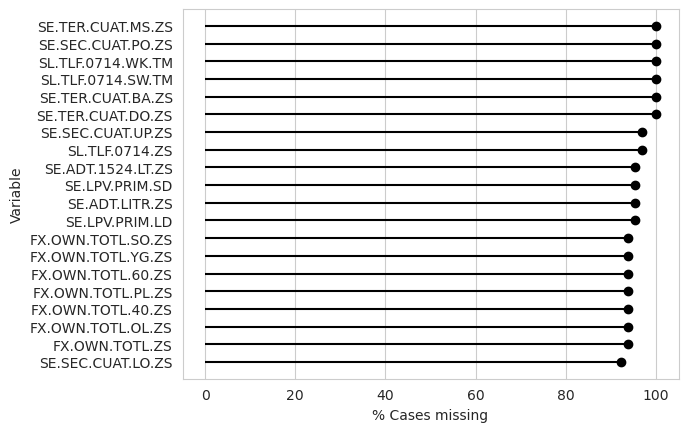

In [28]:
arg_di_df.missing.missing_variable_plot(20)

### Getting the columns with more missing values

In [29]:
variable_summary = arg_di_df.missing.missing_variable_summary()

list(variable_summary[variable_summary['pct_missing'] > 50]['variable'])

['FX.OWN.TOTL.ZS',
 'FX.OWN.TOTL.OL.ZS',
 'FX.OWN.TOTL.40.ZS',
 'FX.OWN.TOTL.PL.ZS',
 'FX.OWN.TOTL.60.ZS',
 'FX.OWN.TOTL.SO.ZS',
 'FX.OWN.TOTL.YG.ZS',
 'per_si_allsi.adq_pop_tot',
 'per_allsp.adq_pop_tot',
 'per_sa_allsa.adq_pop_tot',
 'per_lm_alllm.adq_pop_tot',
 'SE.PRM.TENR',
 'SL.TLF.0714.SW.TM',
 'SL.TLF.0714.WK.TM',
 'per_si_allsi.ben_q1_tot',
 'per_allsp.ben_q1_tot',
 'per_sa_allsa.ben_q1_tot',
 'per_lm_alllm.ben_q1_tot',
 'SL.TLF.0714.ZS',
 'SE.PRM.UNER',
 'SE.COM.DURS',
 'per_si_allsi.cov_pop_tot',
 'per_allsp.cov_pop_tot',
 'per_sa_allsa.cov_pop_tot',
 'per_lm_alllm.cov_pop_tot',
 'SE.XPD.CPRM.ZS',
 'SE.XPD.CSEC.ZS',
 'SE.XPD.CTER.ZS',
 'SE.XPD.CTOT.ZS',
 'SH.XPD.CHEX.GD.ZS',
 'SE.TER.CUAT.BA.ZS',
 'SE.SEC.CUAT.LO.ZS',
 'SE.SEC.CUAT.PO.ZS',
 'SE.PRM.CUAT.ZS',
 'SE.TER.CUAT.ST.ZS',
 'SE.SEC.CUAT.UP.ZS',
 'SE.TER.CUAT.MS.ZS',
 'SE.TER.CUAT.DO.ZS',
 'IT.NET.BBND',
 'SL.TLF.ADVN.ZS',
 'SL.TLF.BASC.ZS',
 'SL.TLF.INTM.ZS',
 'SE.ADT.LITR.ZS',
 'SE.ADT.1524.LT.ZS',
 'SE.PRM.OENR.ZS',

### Getting the rows with more missing values

In [ ]:
variable_summary = arg_di_df.missing.missing_case_summary()
indexes_of_cases = list(variable_summary[variable_summary['pct_missing'] > 50]['case'])
arg_di_df_worst_cases = arg_di_df.loc[arg_di_df.index.isin(indexes_of_cases)]
arg_di_df_worst_cases

(41, 99)

<Axes: xlabel='year.of.dictatorship', ylabel='count'>

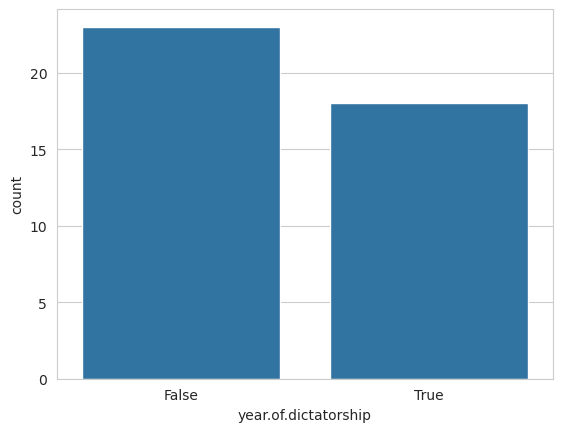

In [38]:
years_of_dictatorship = arg_di_df_worst_cases.value_counts('year.of.dictatorship')
sns.barplot(data=years_of_dictatorship)

In [12]:
arg_di_df_best_cases = arg_di_df.iloc[39:63].copy()
variable_summary = arg_di_df_best_cases.missing.missing_variable_summary()
arg_di_df_best_cases.drop(list(variable_summary[variable_summary['pct_missing'] > 50].loc[:,('variable')]), axis=1, inplace=True)

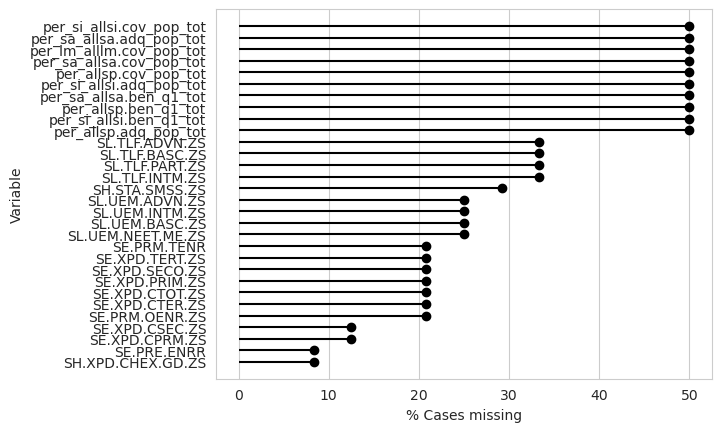

In [13]:
arg_di_df_best_cases.missing.missing_variable_plot(30)

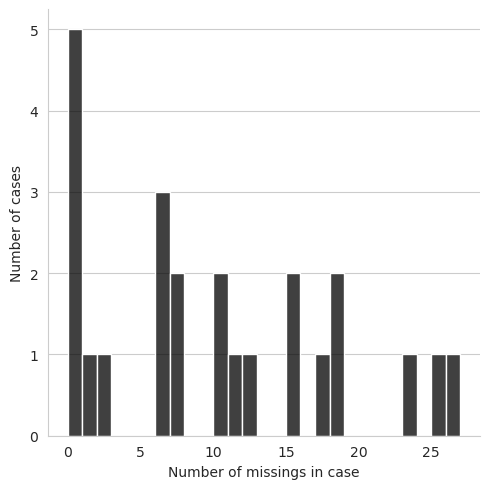

In [16]:
arg_di_df_best_cases.missing.missing_case_plot(30)

In [ ]:
(
    arg_di_df_best_cases
        .missing
        .missing_variable_run(
            variable="Coverage of social insurance programs (% of population)"
        )
)

,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [16]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Adequacy of social safety net programs (% of total welfare of beneficiary households)"
    )
)

,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [17]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Coverage of unemployment benefits and ALMP (% of population)"
    )
)


,run_length,is_na
0,7,missing
1,1,complete
2,3,missing
3,5,complete
4,1,missing
5,6,complete
6,1,missing


In [19]:
(
    arg_di_df_best_cases
    .missing
    .missing_variable_run(
        variable="Labor force with advanced education (% of total working-age population with advanced education)"
    )
)


,run_length,is_na
0,5,missing
1,3,complete
2,1,missing
3,7,complete
4,2,missing
5,6,complete


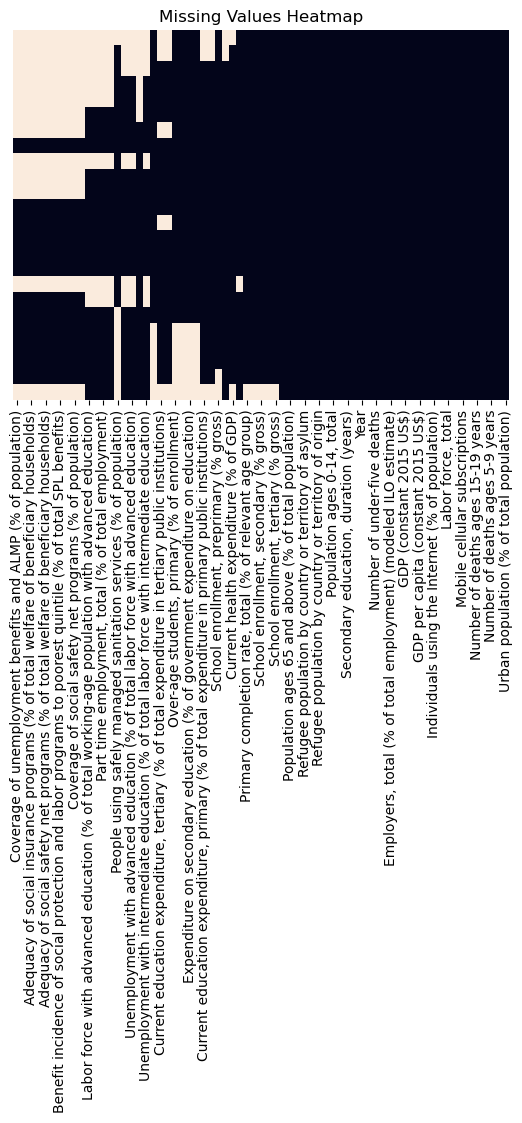

In [14]:
data = arg_di_df_best_cases.missing.sort_variables_by_missingness()
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

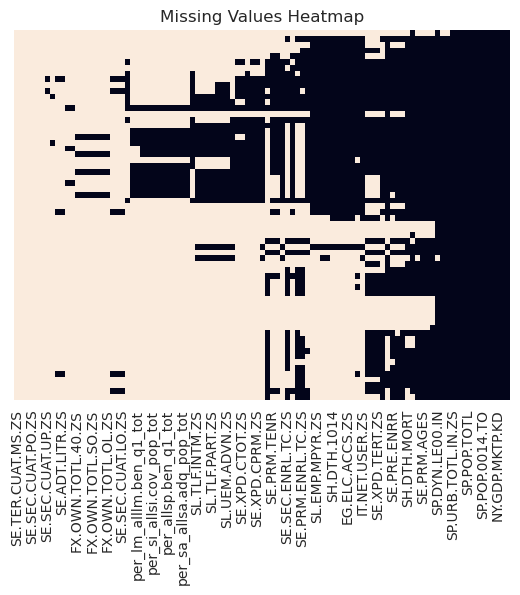

In [34]:
data = arg_di_df.missing.sort_variables_by_missingness().sort_values(by="year.of.dictatorship")
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

Shadow matrix

In [ ]:
arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True)

,Year,Access to electricity (% of population),Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),"Adjusted net enrollment rate, primary (% of primary school age children)",Benefit incidence of social insurance programs to poorest quintile (% of total social insurance benefits),Benefit incidence of social protection and labor programs to poorest quintile (% of total SPL benefits),Benefit incidence of social safety net programs to poorest quintile (% of total safety net benefits),"Children out of school, primary",...,People using safely managed sanitation services (% of population)_NA,"Primary completion rate, total (% of relevant age group)_NA","School enrollment, preprimary (% gross)_NA","School enrollment, primary (% gross)_NA","School enrollment, secondary (% gross)_NA","School enrollment, tertiary (% gross)_NA","Share of youth not in education, employment or training, total (% of youth population) (modeled ILO estimate)_NA",Unemployment with advanced education (% of total labor force with advanced education)_NA,Unemployment with basic education (% of total labor force with basic education)_NA,Unemployment with intermediate education (% of total labor force with intermediate education)_NA
39,1999,95.133156,NaN,NaN,NaN,99.62729,NaN,NaN,NaN,33025.0,...,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing
40,2000,95.700000,NaN,NaN,NaN,99.35688,NaN,NaN,NaN,20886.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing
41,2001,95.500000,NaN,NaN,NaN,99.43632,NaN,NaN,NaN,23214.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing,Missing
42,2002,96.100000,NaN,NaN,NaN,99.45558,NaN,NaN,NaN,23310.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing
43,2003,96.300000,NaN,NaN,NaN,99.42561,NaN,NaN,NaN,20691.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing
44,2004,96.500000,NaN,NaN,NaN,99.13676,NaN,NaN,NaN,4898.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing
45,2005,96.700000,NaN,NaN,NaN,99.34854,NaN,NaN,NaN,11985.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
46,2006,97.000000,42.195049,40.860254,12.671090,99.52115,2.398569,2.776902,20.871813,18925.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
47,2007,97.200000,NaN,NaN,NaN,99.65259,NaN,NaN,NaN,24025.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Missing,Missing,Missing
48,2008,97.500000,NaN,NaN,NaN,99.52275,NaN,NaN,NaN,20935.0,...,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


<Axes: >

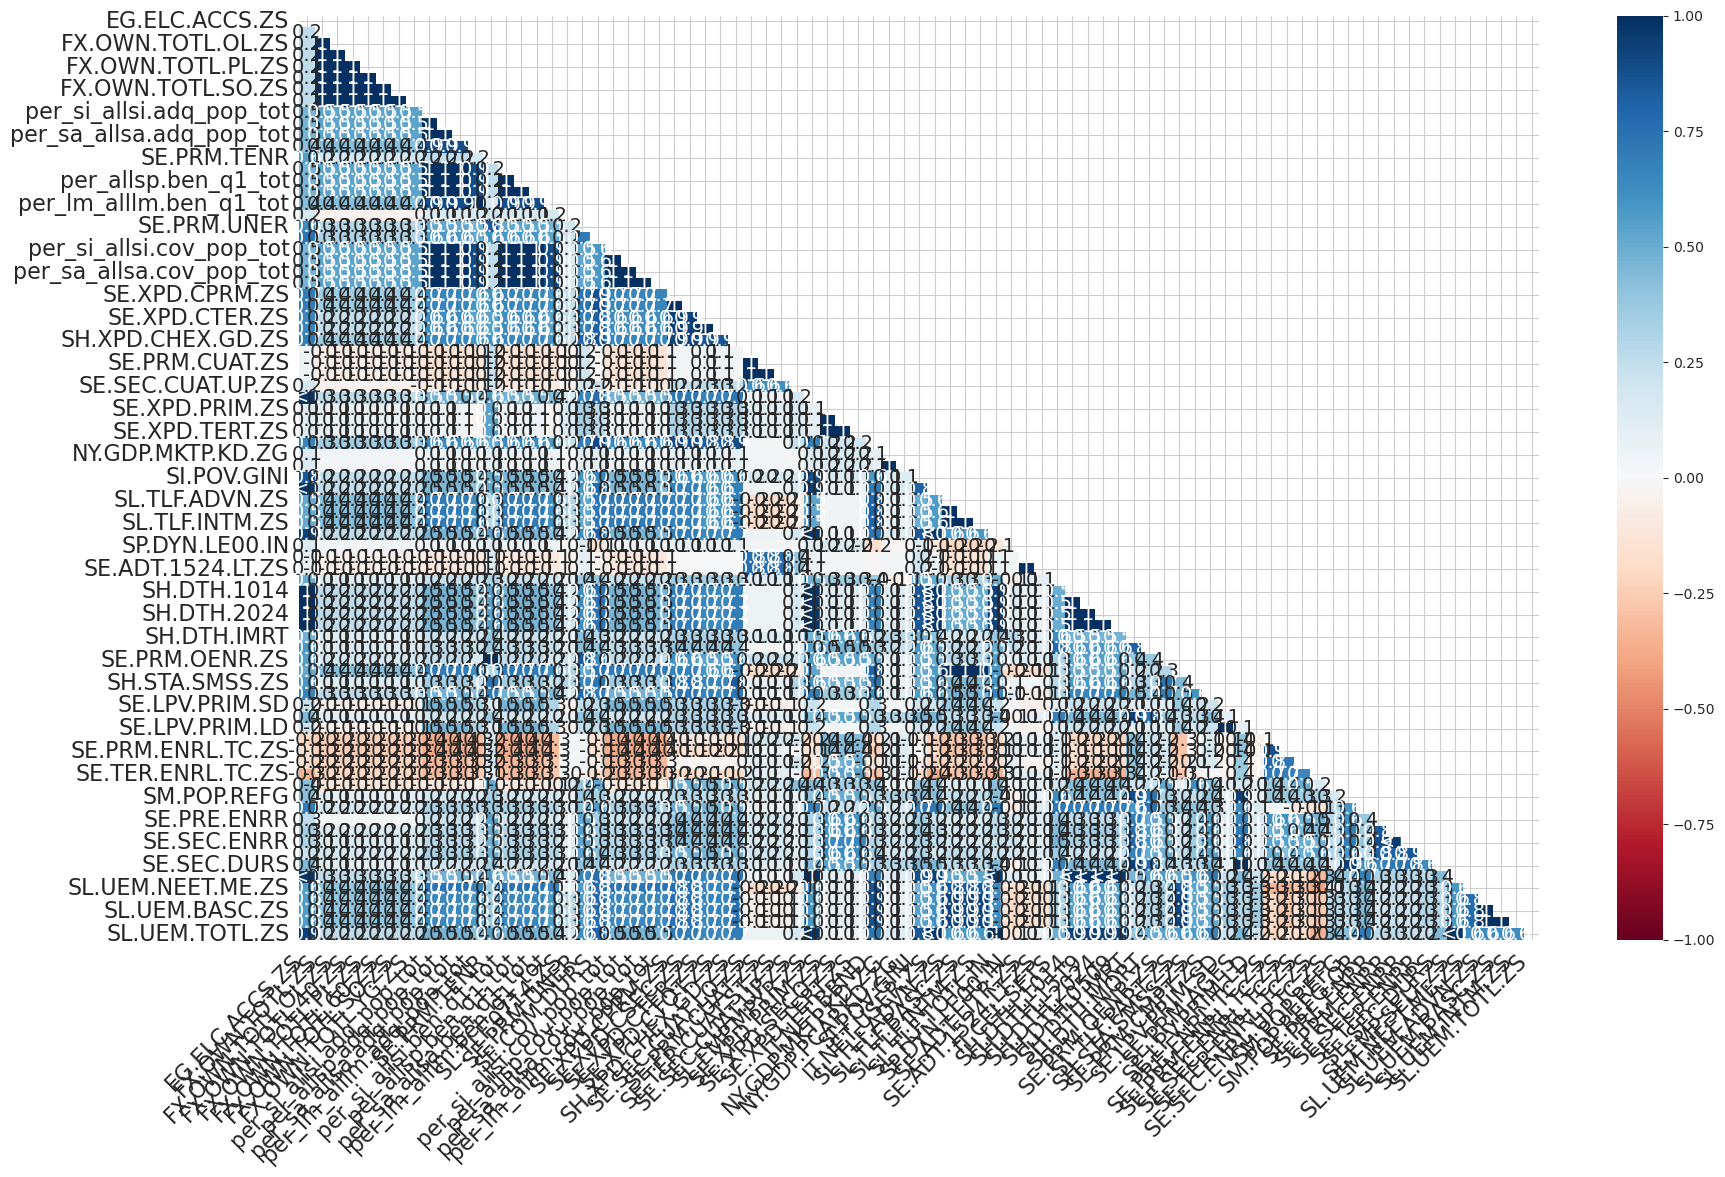

In [36]:
missingno.heatmap(df=arg_di_df)

#Si da negativo: cuando falta el valor de una variable, también falta el otro en la proporción indicada. Si da positivo: tienes ambos valores en cada registro

<Axes: >

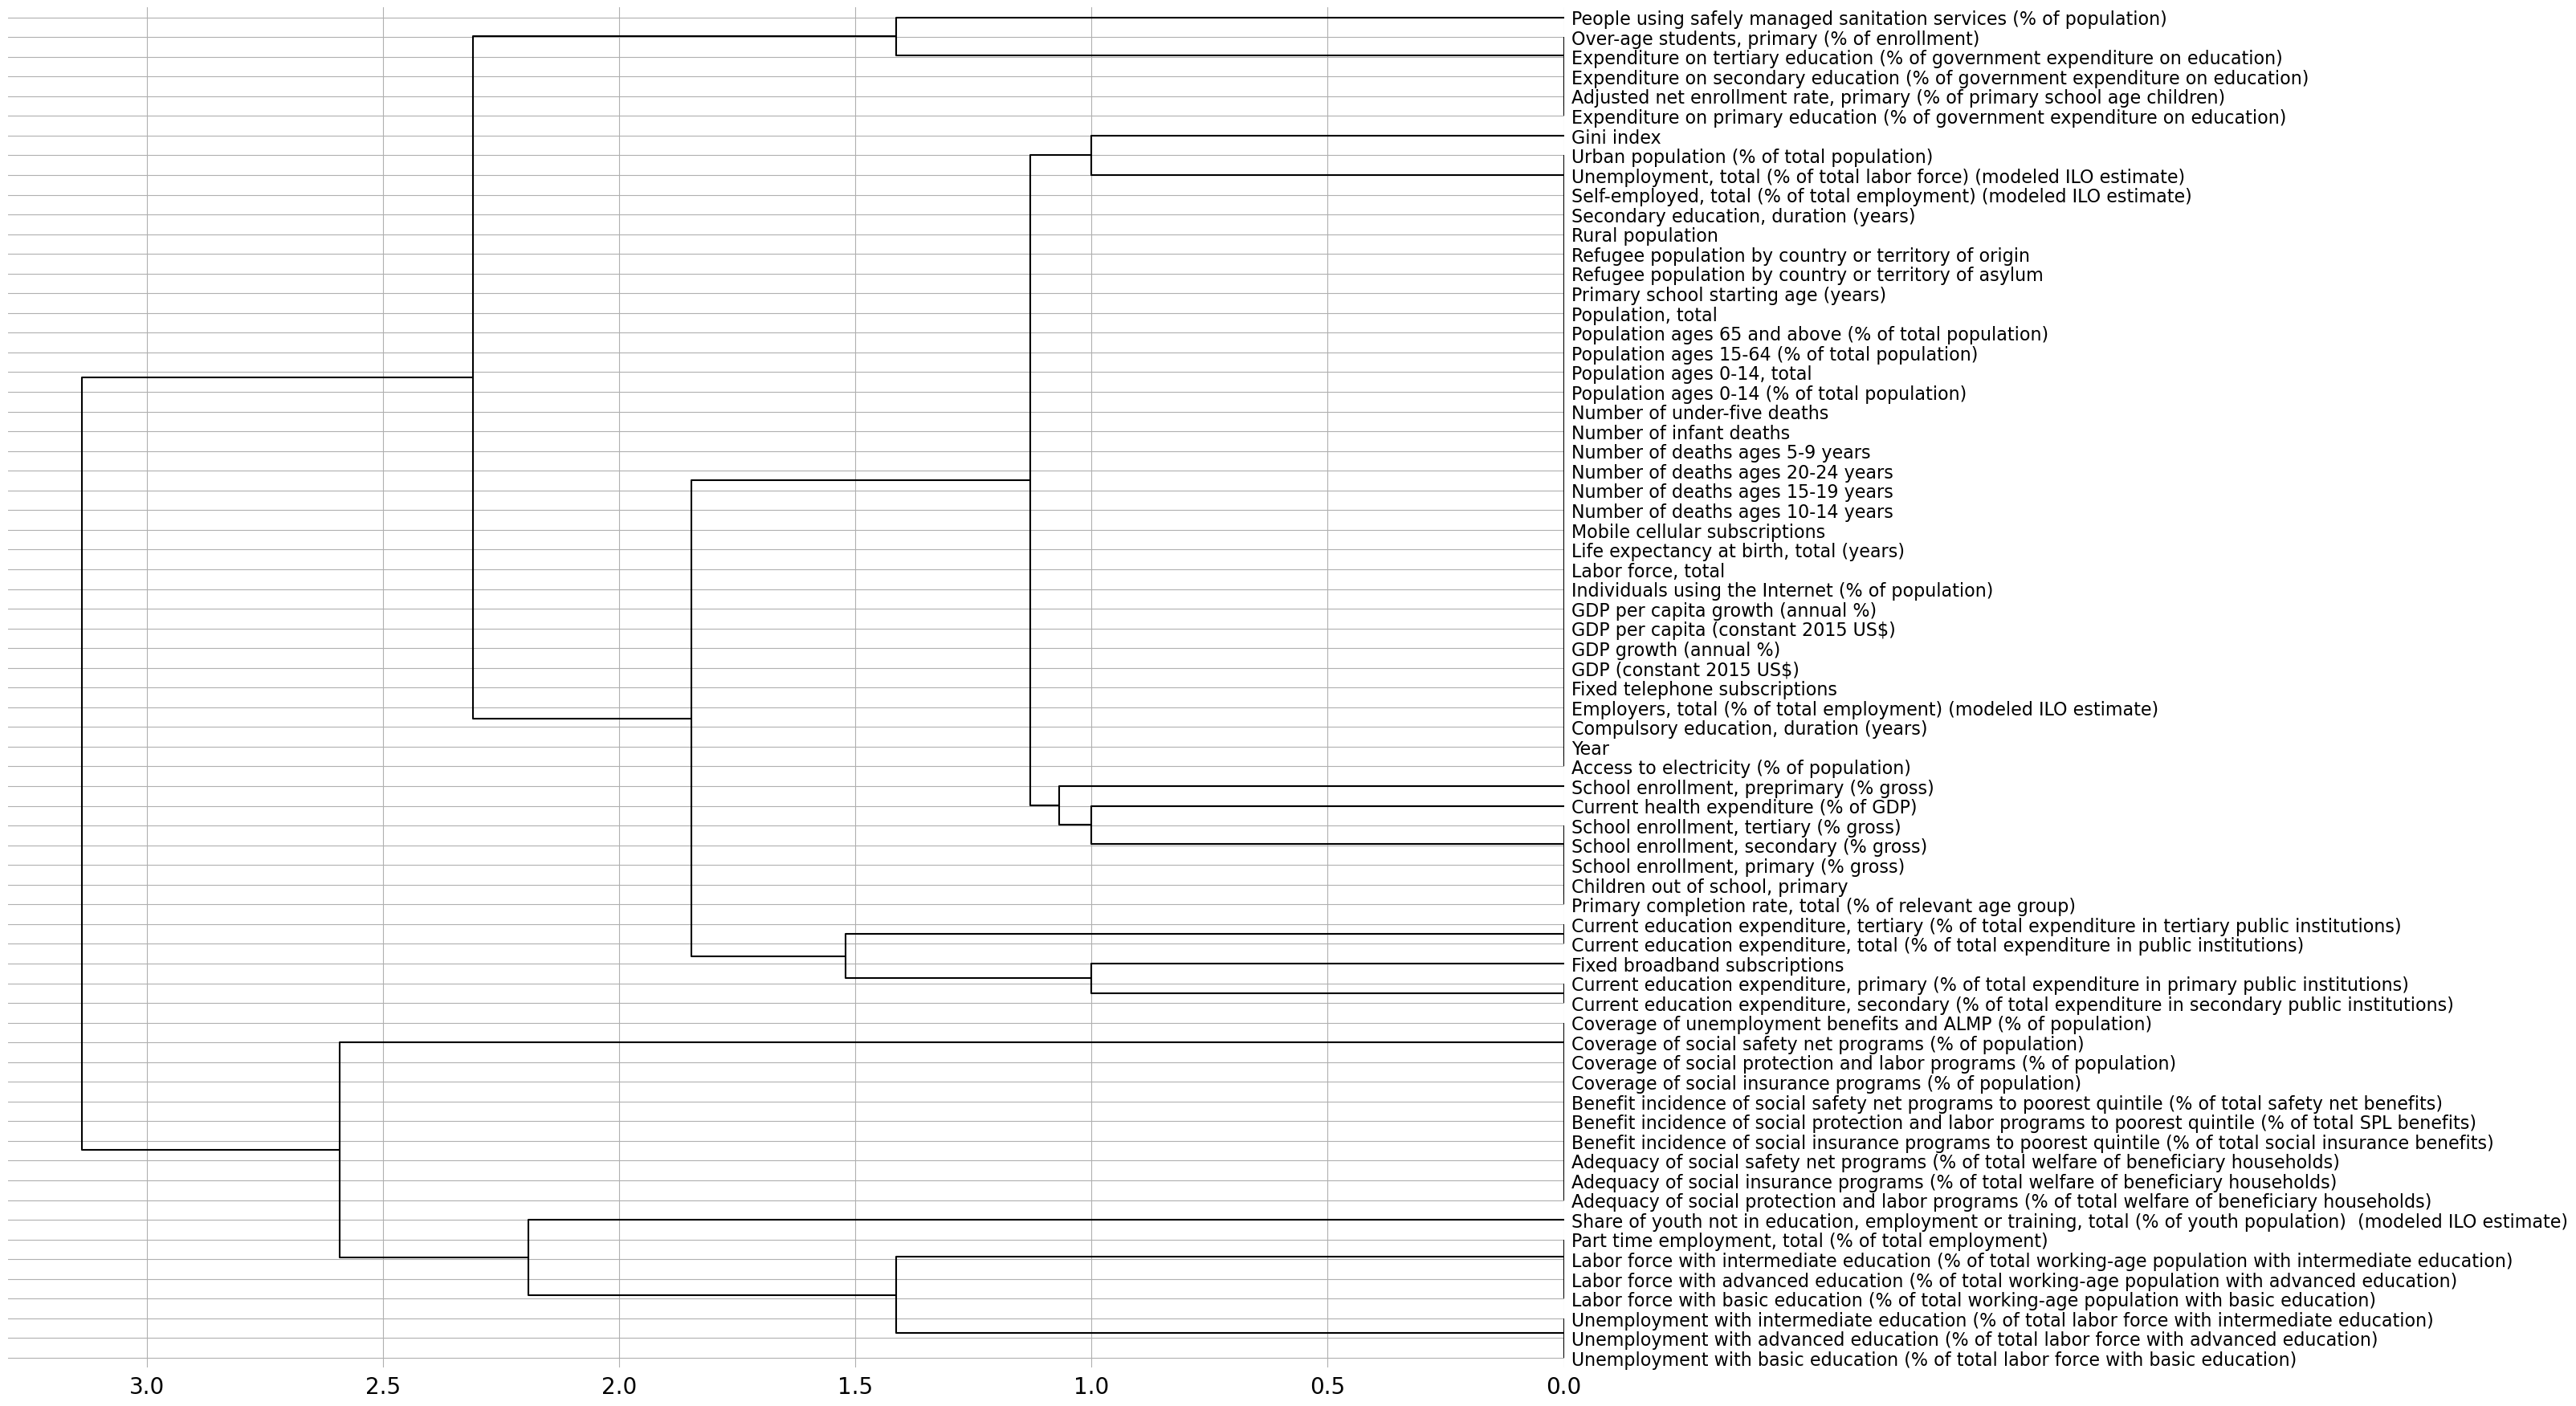

In [ ]:
missingno.dendrogram(df=arg_di_df_best_cases)
#Agrupa con clusters jerárquicos las variables con correlación muy alta (relación más cercana cuando las ramas están más cerca)

Imputation of a single value

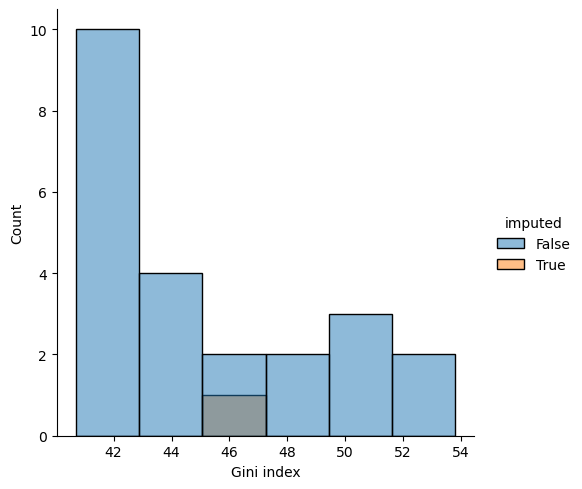

In [21]:
(
    arg_di_df_best_cases
        [["Gini index", "Year"]]
        .missing.bind_shadow_matrix(true_string=True, false_string=False)
        .apply(
            axis="rows",
            func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
        )
        .assign(imputed=lambda df: df["Gini index_NA"])
        .pipe(
            lambda df: (
                sns.displot(
                    data=df,
                    x="Gini index",
                    hue="imputed"
                )
            )
        )
)

In [7]:
output_indicators_file = arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index_label='Year')